Ismael Saleem

email: icamp001@odu.edu

Web portfolio: https://ism3aeel.github.io/IsmaelSaleem.github.io/ 



# **Abstract**

In the world of sports, the salary paid to any particular player is determined by a number of factors, mainly the overall athelic ability of the player. In this project, I shall analyze the stats, positions, and career length of a select number of NBA players to determine any possible coorelation between certain accomplishments in a player's career and their average salary.

Data Source

https://data.world/datadavis/nba-salaries

Two csv datasets are given, a list of players and their stats and a list of players along with their salaries each season. The datasets list players drafted from the years 1985 through 2018 

Goal: After cleaning up and organizing the data provided in these two datasets, the significant player statistics will be be analyzed to determine if there is any correletion between certain skills or positions are correlated to an increase in salary

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statistics import mean
from collections import Counter
import matplotlib.pyplot as plt

# **The Two Original Data Sets**

This dataset has the player's stats, as well as the id for each player used in the second data set

In [ ]:
stats_1 = pd.read_csv('players.csv')
stats_1

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,8.0,17.5,NaN,Iowa State University,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,"University of California, Los Angeles",1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Louisiana State University,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,"University of Michigan, San Jose State University",11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,zizican01,"January 4, 1997","Split, Croatia",0.6,58.3,-,70.8,91,17.5,6.4,4.2,3.0,58.3,NaN,23rd overall,1st round,Boston Celtics,2016,6-11,NaN,Ante Zizic,Center,Right,254lb
4681,zoetji01,"December 20, 1953","Uxbridge, Canada",0.1,20.0,-,-,7,-0.8,0.3,1.1,-0.1,20.0,Kent State University,NaN,NaN,NaN,NaN,7-1,"Port Perry in Port Perry, Canada",Jim Zoet,Center,Right,240lb
4682,zopfbi01,"June 7, 1948",NaN,1.4,36.3,NaN,55.6,53,9.6,2.2,0.9,-0.1,NaN,Duquesne University,33rd overall,2nd round,Milwaukee Bucks,1970,6-1,"Monaca in Monaca, Pennsylvania",Bill Zopf,Point Guard,Right,170lb
4683,zubaciv01,"March 18, 1997","Mostar, Bosnia and Herzegovina",0.8,54.0,0.0,76.1,140,17.6,6.9,4.6,5.3,54.0,NaN,32nd overall,2nd round,Los Angeles Lakers,2016,7-1,NaN,Ivica Zubac,Center,Right,240lb


This second data set is used to show the salary of all the players, as well as what teams they were on during particular seasons. The latter data will be used to measure the overall length of the players' careers

In [ ]:
sal_1 = pd.read_csv('salaries_1985to2018.csv')
sal_1.head()

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


# **DATA CLEANING**

For the Player csv, we will disregard all of the columns that will most likely not be useful or have any impact on a players salary ('Weight' for example more than likely has no relationship to how much teams are will to pay the player)

Basic Career stats, as well as positions are kept

In [ ]:
stats_2 = stats_1[['_id', 'name', 'career_AST', 'career_FG%', 'career_FG3%', 'career_FT%', 'career_G','career_PER', 'career_PTS','career_TRB', 'career_WS','position', 'draft_year']]

In [ ]:
stats_2

,_id,name,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,position,draft_year
0,abdelal01,Alaa Abdelnaby,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,Power Forward,1990
1,abdulza01,Zaid Abdul-Aziz,1.2,42.8,NaN,72.8,505,15.1,9.0,8.0,17.5,Power Forward and Center,1968
2,abdulka01,Kareem Abdul-Jabbar,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,Center,1969
3,abdulma02,Mahmoud Abdul-Rauf,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,Point Guard,1990
4,abdulta01,Tariq Abdul-Wahad,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,Shooting Guard,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,zizican01,Ante Zizic,0.6,58.3,-,70.8,91,17.5,6.4,4.2,3.0,Center,2016
4681,zoetji01,Jim Zoet,0.1,20.0,-,-,7,-0.8,0.3,1.1,-0.1,Center,NaN
4682,zopfbi01,Bill Zopf,1.4,36.3,NaN,55.6,53,9.6,2.2,0.9,-0.1,Point Guard,1970
4683,zubaciv01,Ivica Zubac,0.8,54.0,0.0,76.1,140,17.6,6.9,4.6,5.3,Center,2016


## **Picking a time period:**

To avoid oversaturation, data will only be extracted for players who were drafted in a specific year (2000).

In [ ]:
Players_s = stats_2[(stats_2.draft_year == str(2000))]
Players_s

,_id,name,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,position,draft_year
47,alexaco02,Courtney Alexander,1.2,42.2,33.9,81.3,187,11.5,9.0,2.2,4.1,Point Guard and Shooting Guard,2000
172,bagarda01,Dalibor Bagaric,0.4,36.1,0.0,55.9,95,7.0,2.6,2.5,-0.9,Center,2000
207,barkler01,Erick Barkley,1.5,35.6,26.7,90.0,27,9.9,2.9,0.8,0.2,Point Guard,2000
470,brezepr01,Primoz Brezec,0.5,49.8,16.7,70.1,342,13.6,7.2,3.9,10.8,Center,2000
511,browner01,Ernest Brown,0.0,16.7,-,25.0,3,-9.7,1.0,2.0,-0.2,Center,2000
640,cardibr01,Brian Cardinal,1.0,40.8,37.2,86.1,456,12.7,4.6,2.3,15.4,Power Forward and Small Forward,2000
749,claxtsp01,Speedy Claxton,4.3,40.9,19.3,76.2,334,14.5,9.3,2.5,14.2,Point Guard,2000
751,cleavma01,Mateen Cleaves,1.9,38.9,26.7,72.8,167,8.5,3.6,1.0,-0.8,Point Guard,2000
770,collija02,Jason Collier,0.3,45.5,35.0,73.8,151,11.7,5.6,2.9,1.9,Center,2000
854,crawfja01,Jamal Crawford,3.4,41.0,34.8,86.2,1326,15.1,14.6,2.2,60.6,Shooting Guard and Point Guard,2000


## **Renaming the column header:**

To identify the players, the Player csv and the Salaries csv give players an ID with the column names "_id" and "player_id" respectfully. In order to merge the two Dataframes, the column names for the player ids need to match

In [ ]:
P = Players_s.rename(columns= {'_id': 'player_id'})

In [ ]:
P_Stats = P.set_index('player_id')

In [ ]:
P_Stats

,name,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,position,draft_year
player_id,,,,,,,,,,,,
alexaco02,Courtney Alexander,1.2,42.2,33.9,81.3,187,11.5,9.0,2.2,4.1,Point Guard and Shooting Guard,2000
bagarda01,Dalibor Bagaric,0.4,36.1,0.0,55.9,95,7.0,2.6,2.5,-0.9,Center,2000
barkler01,Erick Barkley,1.5,35.6,26.7,90.0,27,9.9,2.9,0.8,0.2,Point Guard,2000
brezepr01,Primoz Brezec,0.5,49.8,16.7,70.1,342,13.6,7.2,3.9,10.8,Center,2000
browner01,Ernest Brown,0.0,16.7,-,25.0,3,-9.7,1.0,2.0,-0.2,Center,2000
cardibr01,Brian Cardinal,1.0,40.8,37.2,86.1,456,12.7,4.6,2.3,15.4,Power Forward and Small Forward,2000
claxtsp01,Speedy Claxton,4.3,40.9,19.3,76.2,334,14.5,9.3,2.5,14.2,Point Guard,2000
cleavma01,Mateen Cleaves,1.9,38.9,26.7,72.8,167,8.5,3.6,1.0,-0.8,Point Guard,2000
collija02,Jason Collier,0.3,45.5,35.0,73.8,151,11.7,5.6,2.9,1.9,Center,2000


## **Removing unnecesary columns:**

For the Salary data set, most of the columns are not needed. So all columns except the player id and salary will be removed

In [ ]:
sal_2 = sal_1[['player_id', 'salary']]
sal_2

,player_id,salary
0,abdelal01,395000
1,abdelal01,494000
2,abdelal01,500000
3,abdelal01,805000
4,abdelal01,650000
...,...,...
14158,zipsepa01,750000
14159,zipsepa01,1312611
14160,zizican01,1645200
14161,zubaciv01,1034956


## **Calculating total Seasons played for all players:**

The original dataset for salaries had several duplicate ids because of the fact that players return for multiple seasons and have different salaries each season. This proved to an advatange as these duplicates can be used to calculate the length of the careers of all the players. The player_id column is made the index so that it can be properly merged with other dataframes

In [ ]:
a = dict(Counter(sal_2['player_id']))

In [ ]:
s = pd.Series(a)

In [ ]:
Sea = pd.DataFrame(s)
Season = Sea.rename(columns = {0 : 'Seasons'})
Season.index.name = 'player_id'

In [ ]:
Season

,Seasons
player_id,
abdelal01,5
abdulka01,4
abdulma02,9
abdulta01,10
abdursh01,11
...,...
zidekge01,3
zimmest01,1
zipsepa01,2


## **Organizing the Salaries:**

Since the salary of one player can vary depending on the season, the entire career of each player will be taken into account to calculate the average salary of each player. The averages will have to be rounded up using np.floor

In [ ]:
df = sal_2.groupby('player_id')['salary'].mean()

In [ ]:
df

player_id
abdelal01    5.688000e+05
abdulka01    2.140000e+06
abdulma02    2.205500e+06
abdulta01    3.798280e+06
abdursh01    8.715091e+06
                 ...     
zidekge01    6.937333e+05
zimmest01    9.500000e+05
zipsepa01    1.031306e+06
zizican01    1.645200e+06
zubaciv01    1.173784e+06
Name: salary, Length: 2408, dtype: float64

In [ ]:
df2 = df.apply(np.floor)

In [ ]:
df2

player_id
abdelal01     568800.0
abdulka01    2140000.0
abdulma02    2205500.0
abdulta01    3798280.0
abdursh01    8715090.0
               ...    
zidekge01     693733.0
zimmest01     950000.0
zipsepa01    1031305.0
zizican01    1645200.0
zubaciv01    1173783.0
Name: salary, Length: 2408, dtype: float64

In [ ]:
Sal = pd.DataFrame(df2)

Sal

,salary
player_id,
abdelal01,568800.0
abdulka01,2140000.0
abdulma02,2205500.0
abdulta01,3798280.0
abdursh01,8715090.0
...,...
zidekge01,693733.0
zimmest01,950000.0
zipsepa01,1031305.0


## **Salary and Season dataframes are merged:**

In [ ]:
Sal_Sea = pd.merge(Sal, Season, left_index=True, right_index=True)

In [ ]:
Sal_Sea

,salary,Seasons
player_id,,
abdelal01,568800.0,5
abdulka01,2140000.0,4
abdulma02,2205500.0,9
abdulta01,3798280.0,10
abdursh01,8715090.0,11
...,...,...
zidekge01,693733.0,3
zimmest01,950000.0,1
zipsepa01,1031305.0,2


# **FINAL TABLE**

**Stats and Season/Salaries dataframes are merged**

In [ ]:
results = pd.merge(P_Stats, Sal_Sea, left_index=True, right_index=True)

In [ ]:
results

,name,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,position,draft_year,salary,Seasons
player_id,,,,,,,,,,,,,,
alexaco02,Courtney Alexander,1.2,42.2,33.9,81.3,187,11.5,9.0,2.2,4.1,Point Guard and Shooting Guard,2000,1300460.0,5
bagarda01,Dalibor Bagaric,0.4,36.1,0.0,55.9,95,7.0,2.6,2.5,-0.9,Center,2000,1019915.0,4
barkler01,Erick Barkley,1.5,35.6,26.7,90.0,27,9.9,2.9,0.8,0.2,Point Guard,2000,677566.0,3
brezepr01,Primoz Brezec,0.5,49.8,16.7,70.1,342,13.6,7.2,3.9,10.8,Center,2000,1665997.0,8
browner01,Ernest Brown,0.0,16.7,-,25.0,3,-9.7,1.0,2.0,-0.2,Center,2000,332817.0,1
cardibr01,Brian Cardinal,1.0,40.8,37.2,86.1,456,12.7,4.6,2.3,15.4,Power Forward and Small Forward,2000,3277882.0,12
claxtsp01,Speedy Claxton,4.3,40.9,19.3,76.2,334,14.5,9.3,2.5,14.2,Point Guard,2000,3704660.0,10
cleavma01,Mateen Cleaves,1.9,38.9,26.7,72.8,167,8.5,3.6,1.0,-0.8,Point Guard,2000,1016812.0,5
collija02,Jason Collier,0.3,45.5,35.0,73.8,151,11.7,5.6,2.9,1.9,Center,2000,1398048.0,5


# **Visualization**



## **Average Salary for a NBA player drafted in 2000**

According to the data provided, the average salary for an NBA player who was drafted in the year 2000 is 2,337,083 USD. The standard deviation is quite large due to the shear number of players being accounted for

In [ ]:
results['salary'].mean()

2337083.8163265307

In [ ]:
results['salary'].std()

2092682.5358346947

**Plotting Function:**

For convience purposes, a function is created to easily plug in columns from the final dataframe so that they can be graphed and analyzed

In [ ]:
def plotting (C, D):
  A1 = results.groupby(C)['salary'].mean()
  A2 = A1.apply(np.floor)
  A3 = pd.DataFrame(A2)
  A4= A3.reset_index().plot.scatter(x= C, y= 'salary', title= D).set_ylabel('Salary by millions')
  A4

**Assists:**

Consistent Assists seem to have a loose positive coorelationship to higher salaries

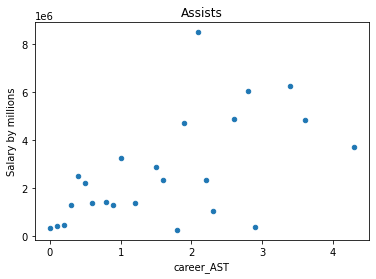

In [ ]:
plotting('career_AST', 'Assists')

## *Games Played:**

A large number of games played is highely coorelated with a higher salary throughout a player's career

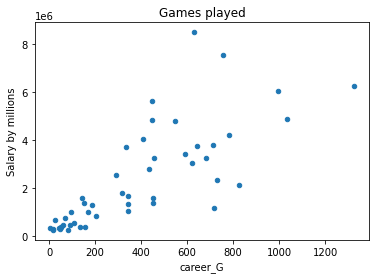

In [ ]:
plotting('career_G', 'Games played')

## **Field Goal percentage:**

Field Goal percentage has little to no coorelation (neither positive nor negative) to a higher salary

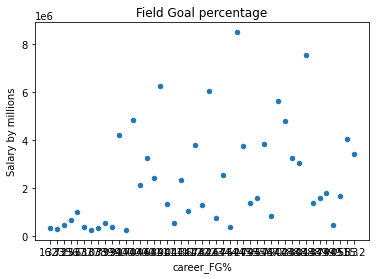

In [ ]:
plotting('career_FG%', 'Field Goal percentage')

## **Points:**

The amount of points a player is able to score per game is highly positively coorelated to a higher salary

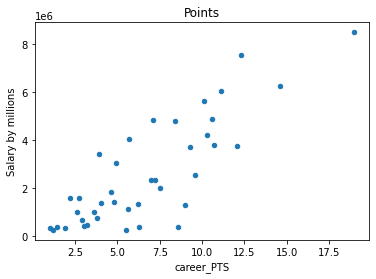

In [ ]:
plotting('career_PTS', 'Points')

## **Rebounds:**

Rebounds per game are loosely coorelated with higher salaries

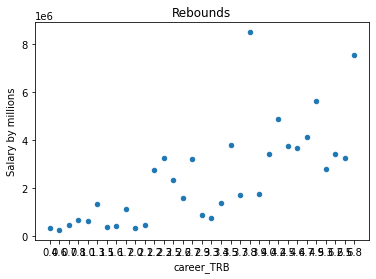

In [ ]:
plotting('career_TRB', 'Rebounds')

## **Win Shares:**

A player's contribution to the success of the team has no coorelation to how high a players salary will be

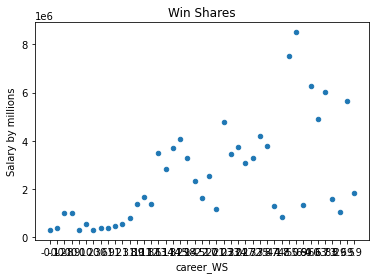

In [ ]:
plotting('career_WS', 'Win Shares')

## **Offical Player Rating:**

Official player rating appears to have some coorelation at first, but at a certain point the average salary is much lower, so there is a very weak coorelation

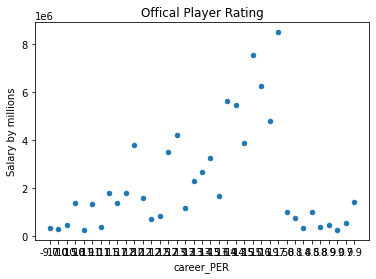

In [ ]:
plotting('career_PER', 'Offical Player Rating')

## **Player Position:**

It appears that on average, those players who's positions throughout their careers included Power foward and center, shooting guard and small forward, and shooting guard and small forward tend to have higher salaries. Oddly enough, those players who tended to only be shooting guards throughout their careers tend to have the lowest salaries

Text(0, 0.5, 'Salary by millions')

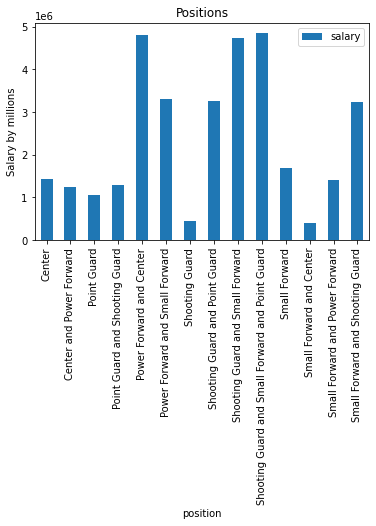

In [ ]:
p1 = results.groupby('position')['salary'].mean()
p2 = p1.apply(np.floor)
p3 = pd.DataFrame(p2)
p4= p3.reset_index().plot.bar(x= 'position', y= 'salary', title= 'Positions').set_ylabel('Salary by millions')
p4

## **Number of Seasons played**

Longer careers seem to be positively coorelated with higher salaries

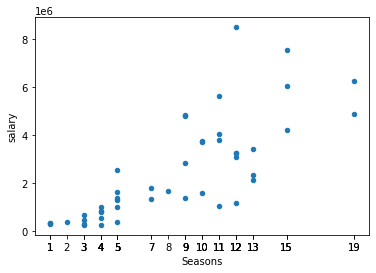

In [ ]:
Seas_play =  results[['Seasons', 'salary']]
Seas_play2 = Seas_play.set_index(['Seasons'])
Seas_play3 = Seas_play2.groupby(['Seasons', 'salary']).sum()
Seas_play4 = Seas_play3.reset_index('salary')
Seas_play4.reset_index().plot.scatter(x= 'Seasons', y= 'salary', xticks= Seas_play4.reset_index()['Seasons'])

# **Conclusion**

According to the data collected, when looking at players drafted in the year 2000, the ones who were the most well paid tend to naturally be in more games and have longer careers as to be expected. In terms of skills, players should look to perfecting rebounds as well as the total amount of points they score per game. Players should also diversify the number of positions they play throughout their career, as those who tend to stay in one position are typically paid far less than those who have played two or more positions in their career

For future analysis, different periods of time can be analyzed as to paint a more wholestic picture

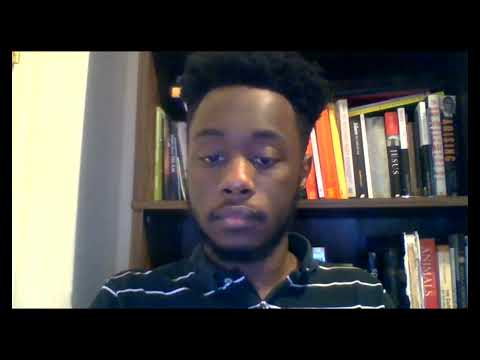

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('zS7p5cLPIfY')